In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import keras 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Generating reproducible results from same code
tf.random.set_seed(14) 

In [4]:
gas=pd.read_csv("gas_turbines.csv")
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
# Checking for null values
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
# Checking for duplicate values
gas.duplicated().sum()

0

In [7]:
df=gas[['AT','AP','AH','TEY']]
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [9]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


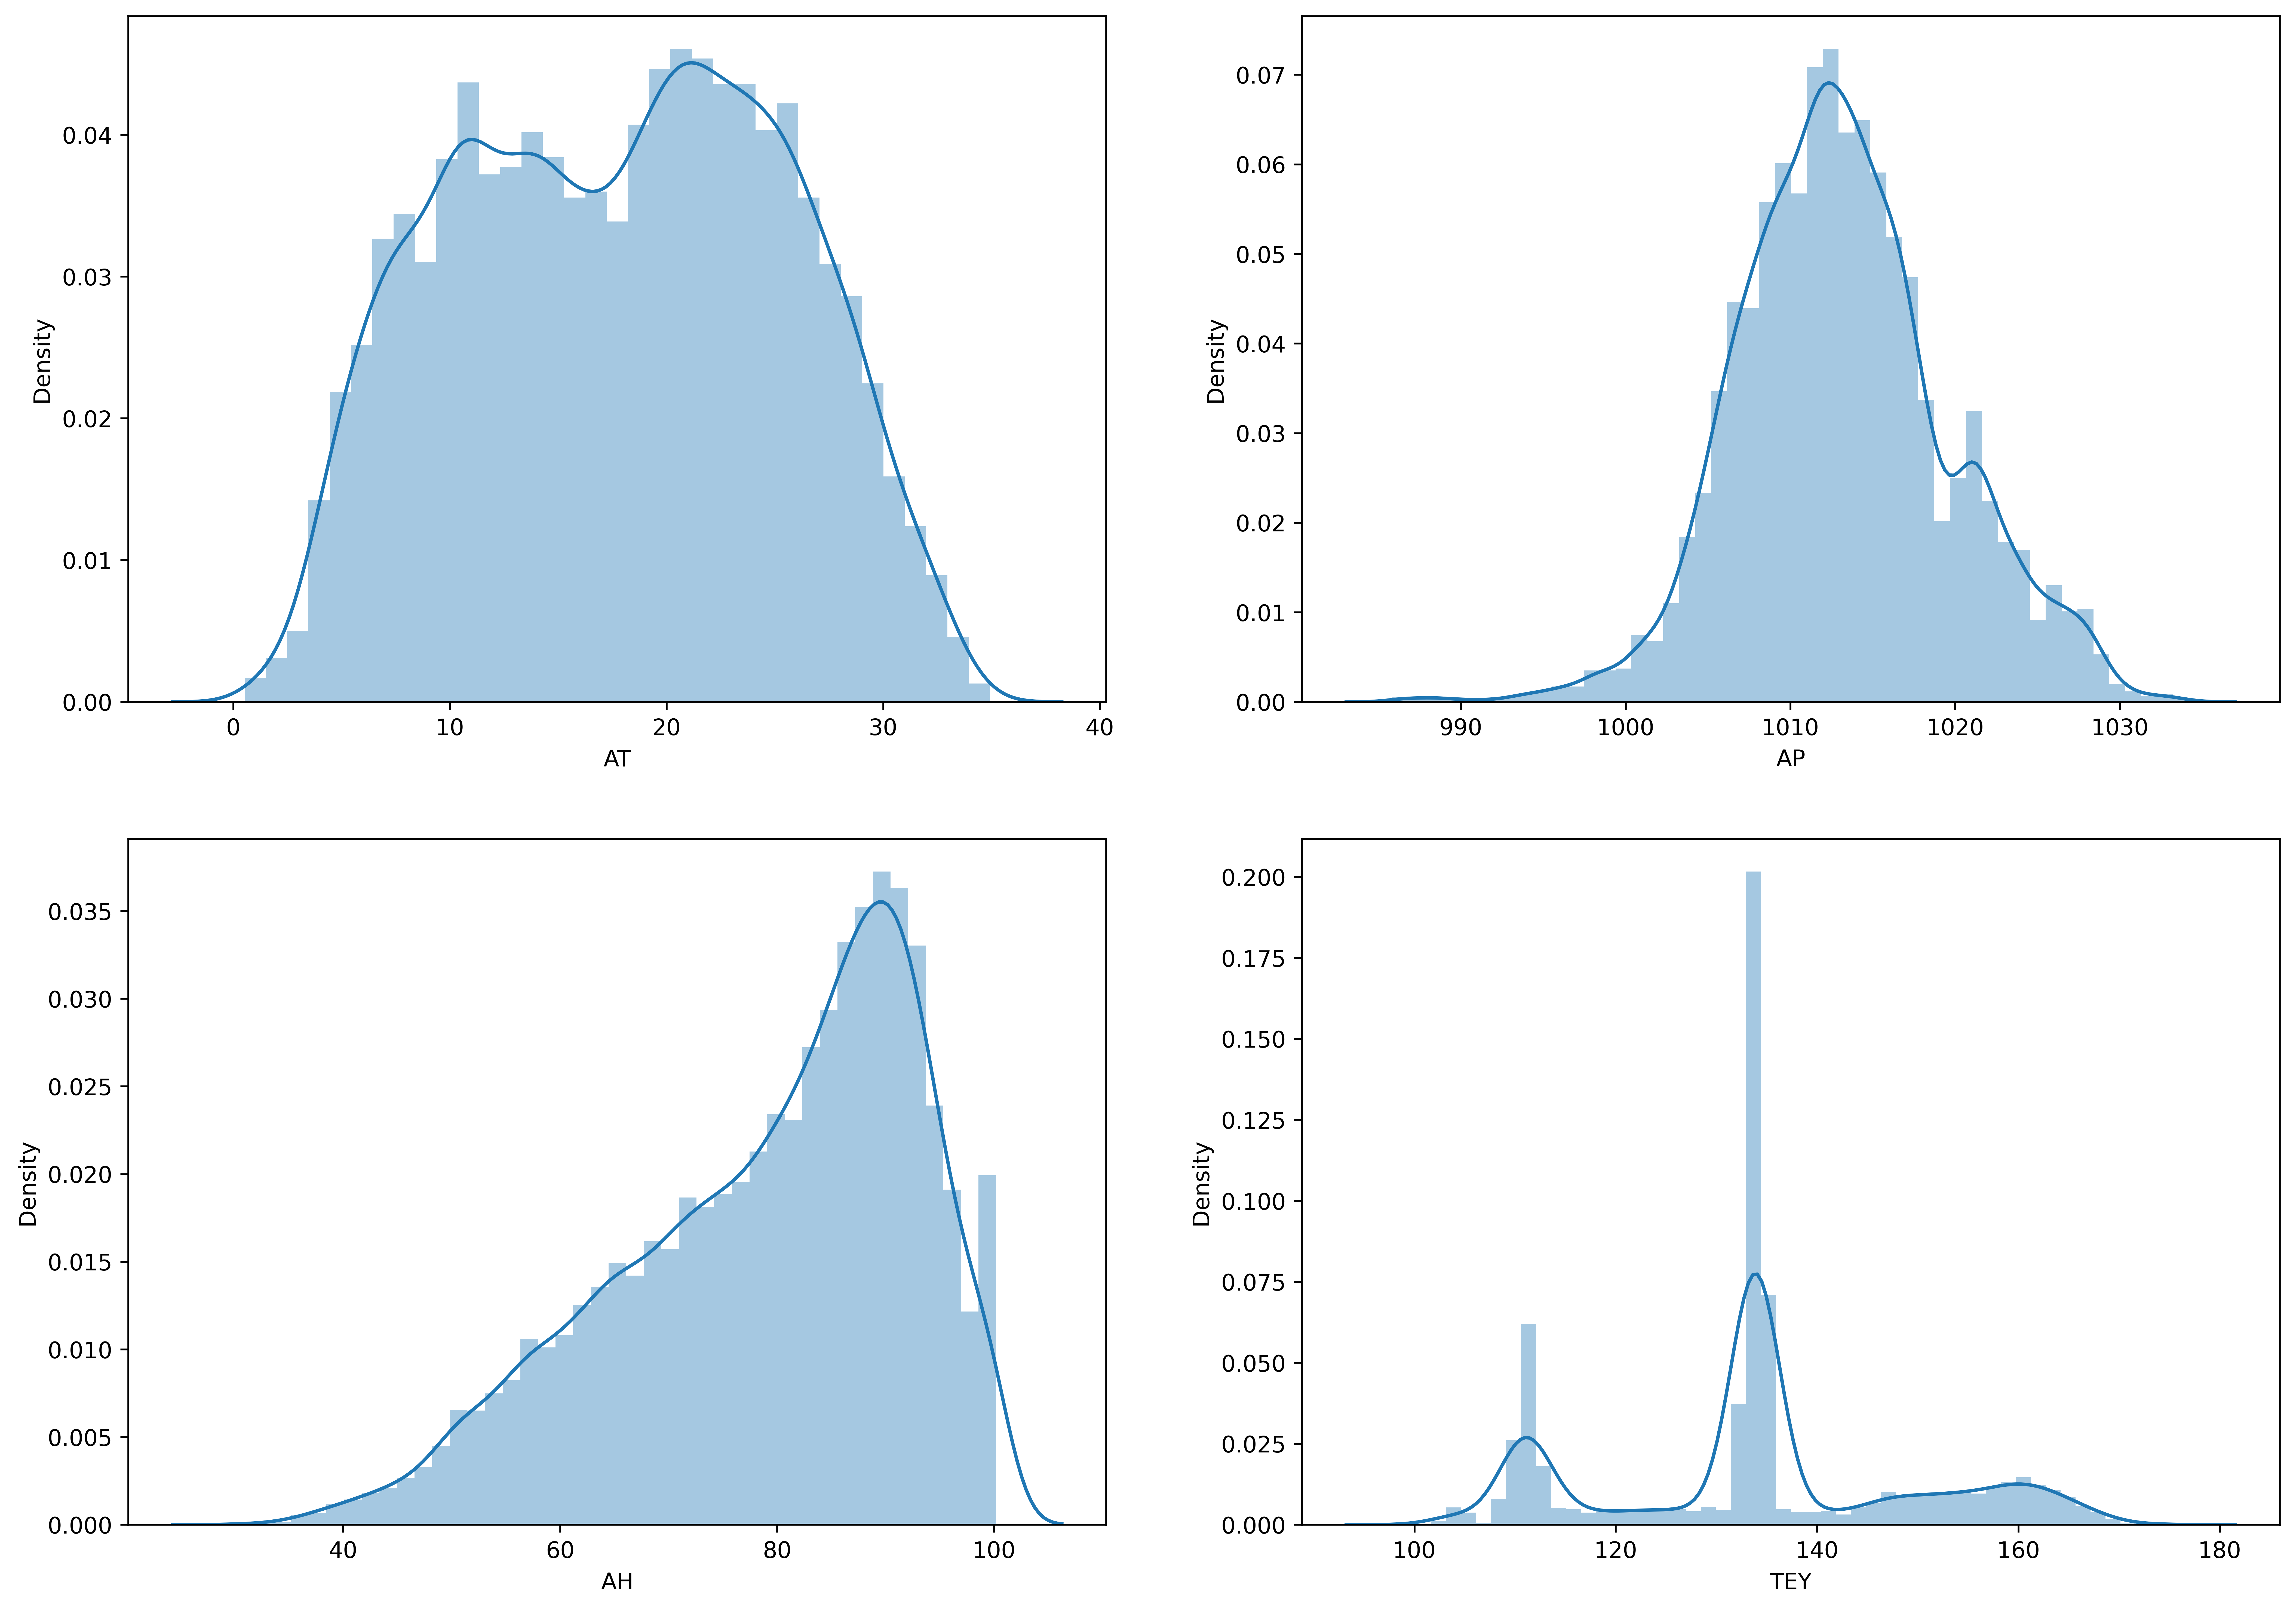

In [10]:
# distplot

fig, ax = plt.subplots(2,2, figsize = (17,12),dpi=600)

sns.distplot(df.AT, ax = ax[0,0])
sns.distplot(df.AP, ax = ax[0,1])
sns.distplot(df.AH, ax = ax[1,0])
sns.distplot(df.TEY, ax = ax[1,1])
plt.show()

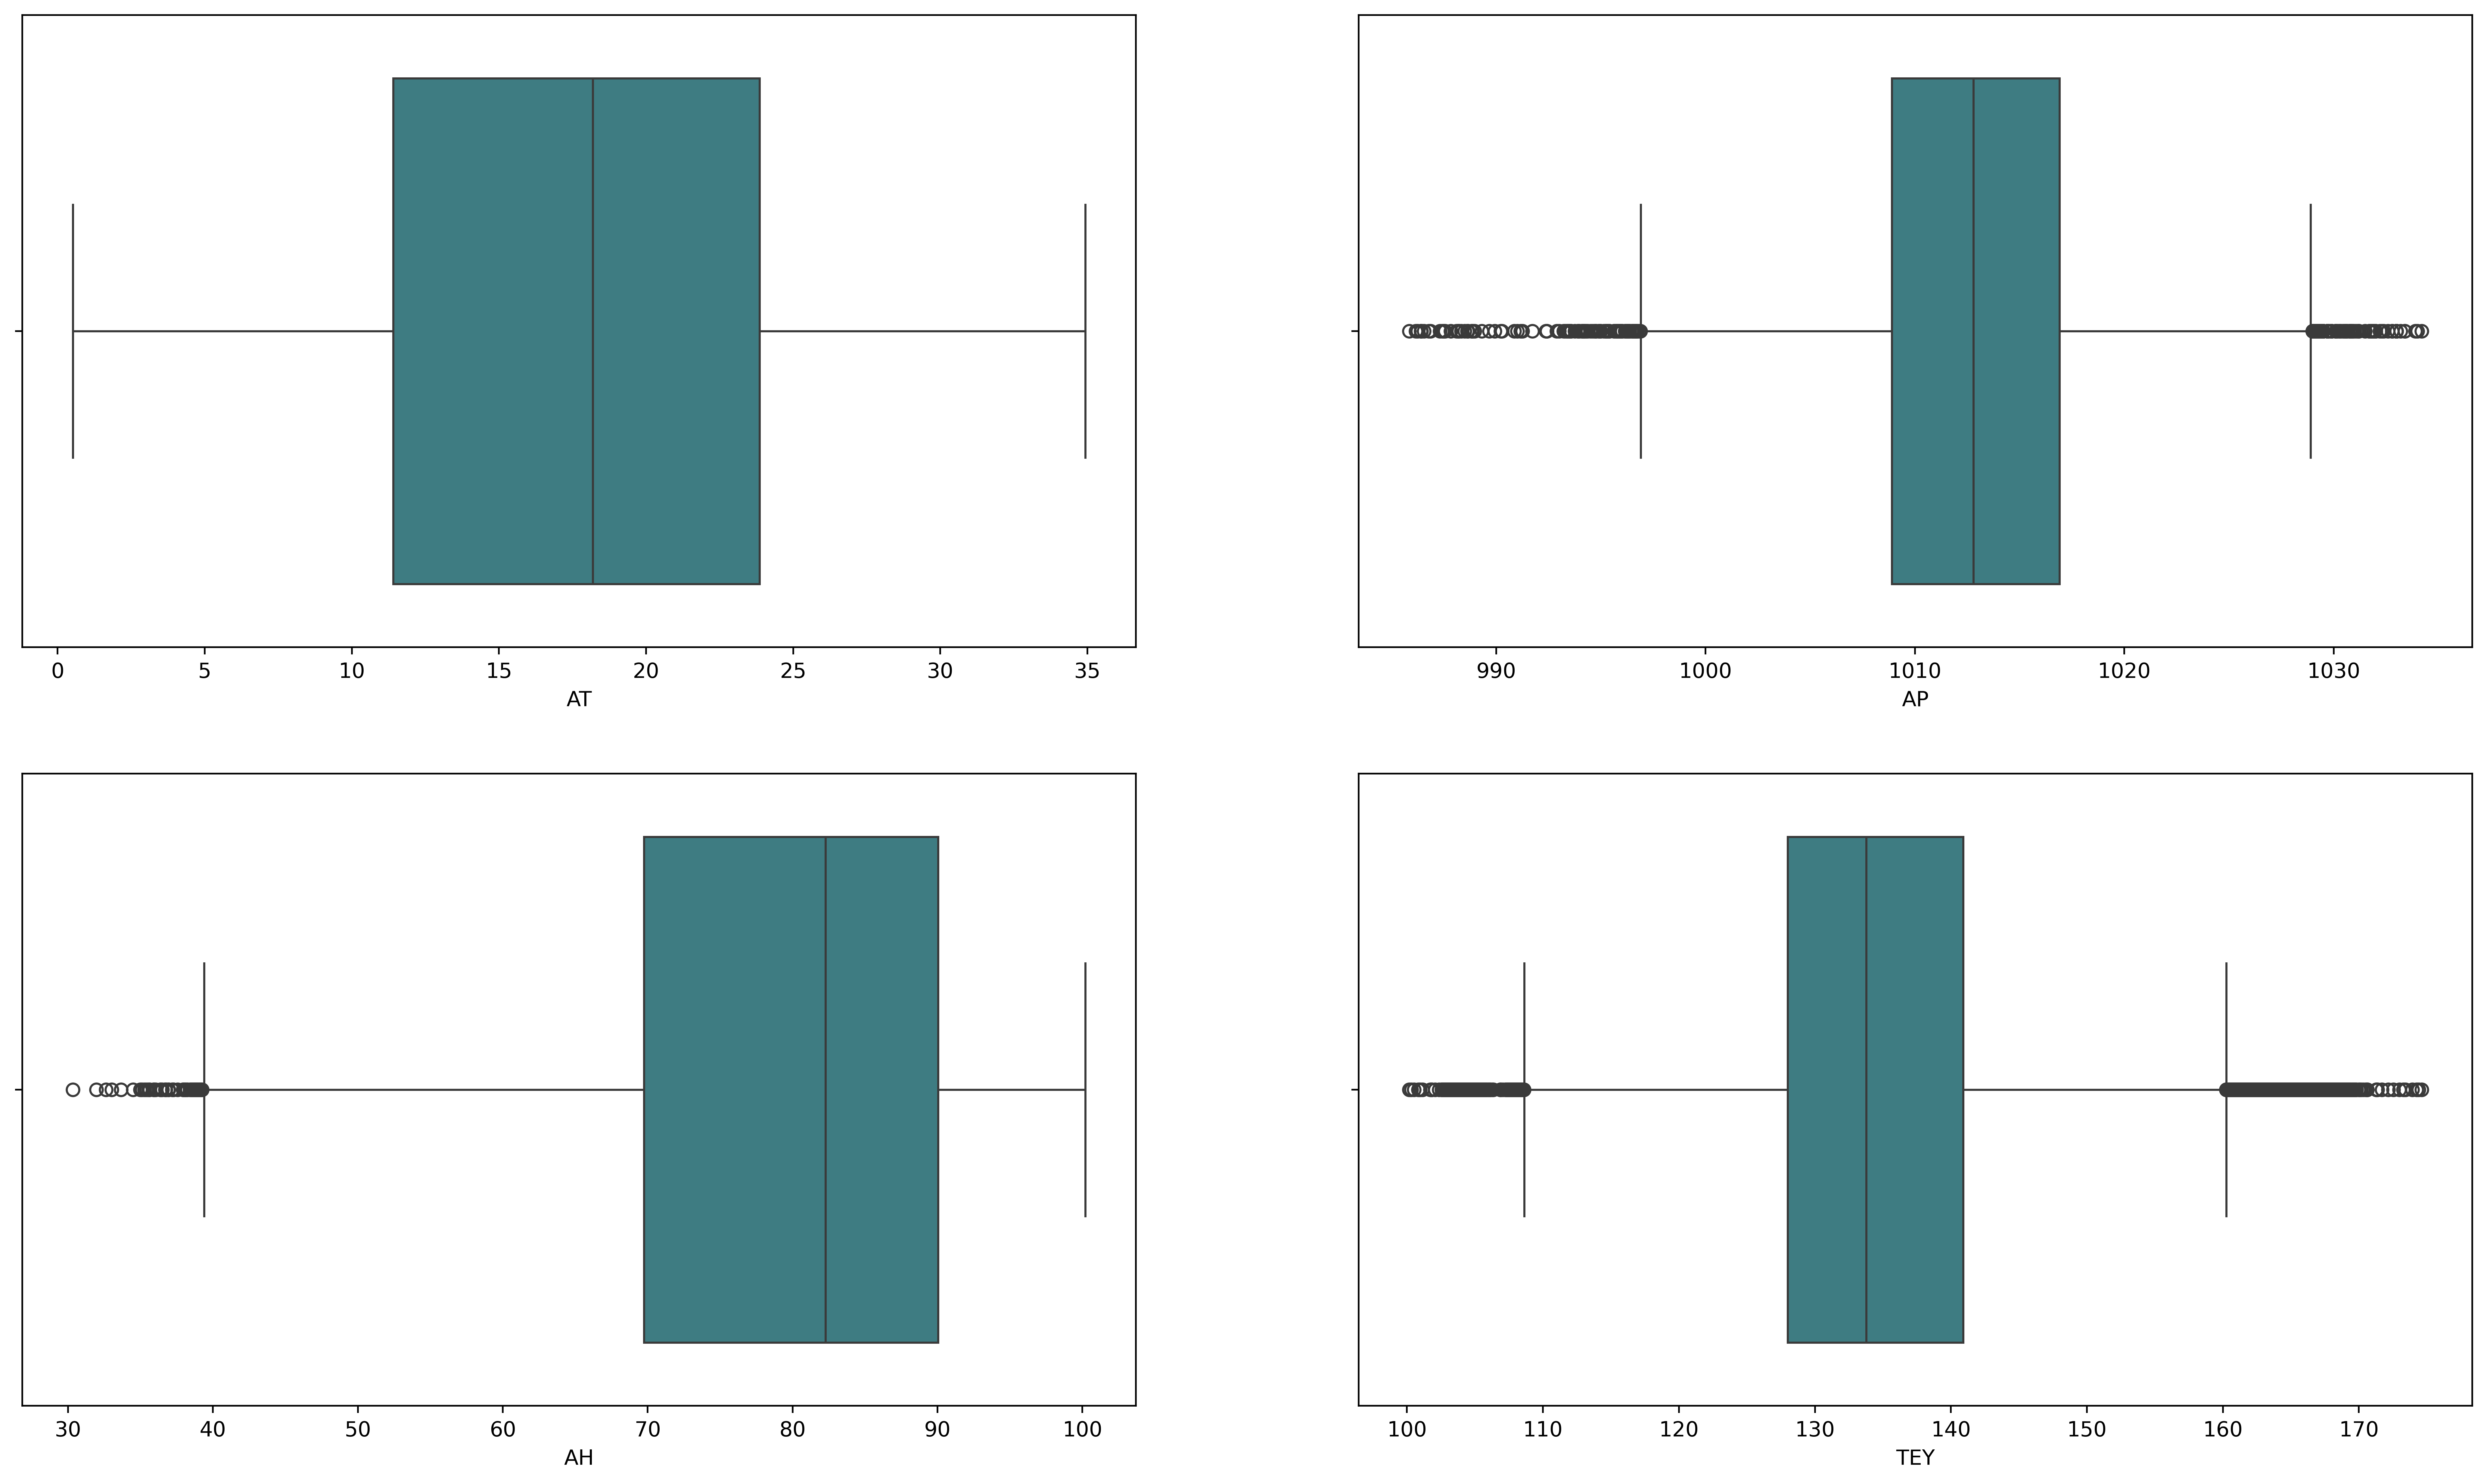

In [11]:
# Outlier detection
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 12),dpi=500)
sns.boxplot(x='AT',data=df,palette='crest',ax=axes[0,0])
sns.boxplot(x='AP',data=df,palette='crest',ax=axes[0,1])
sns.boxplot(x='AH',data=df,palette='crest',ax=axes[1,0])
sns.boxplot(x='TEY',data=df,palette='crest',ax=axes[1,1])
plt.show()

Text(0.5, 1.0, 'Histogram of the Target Column')

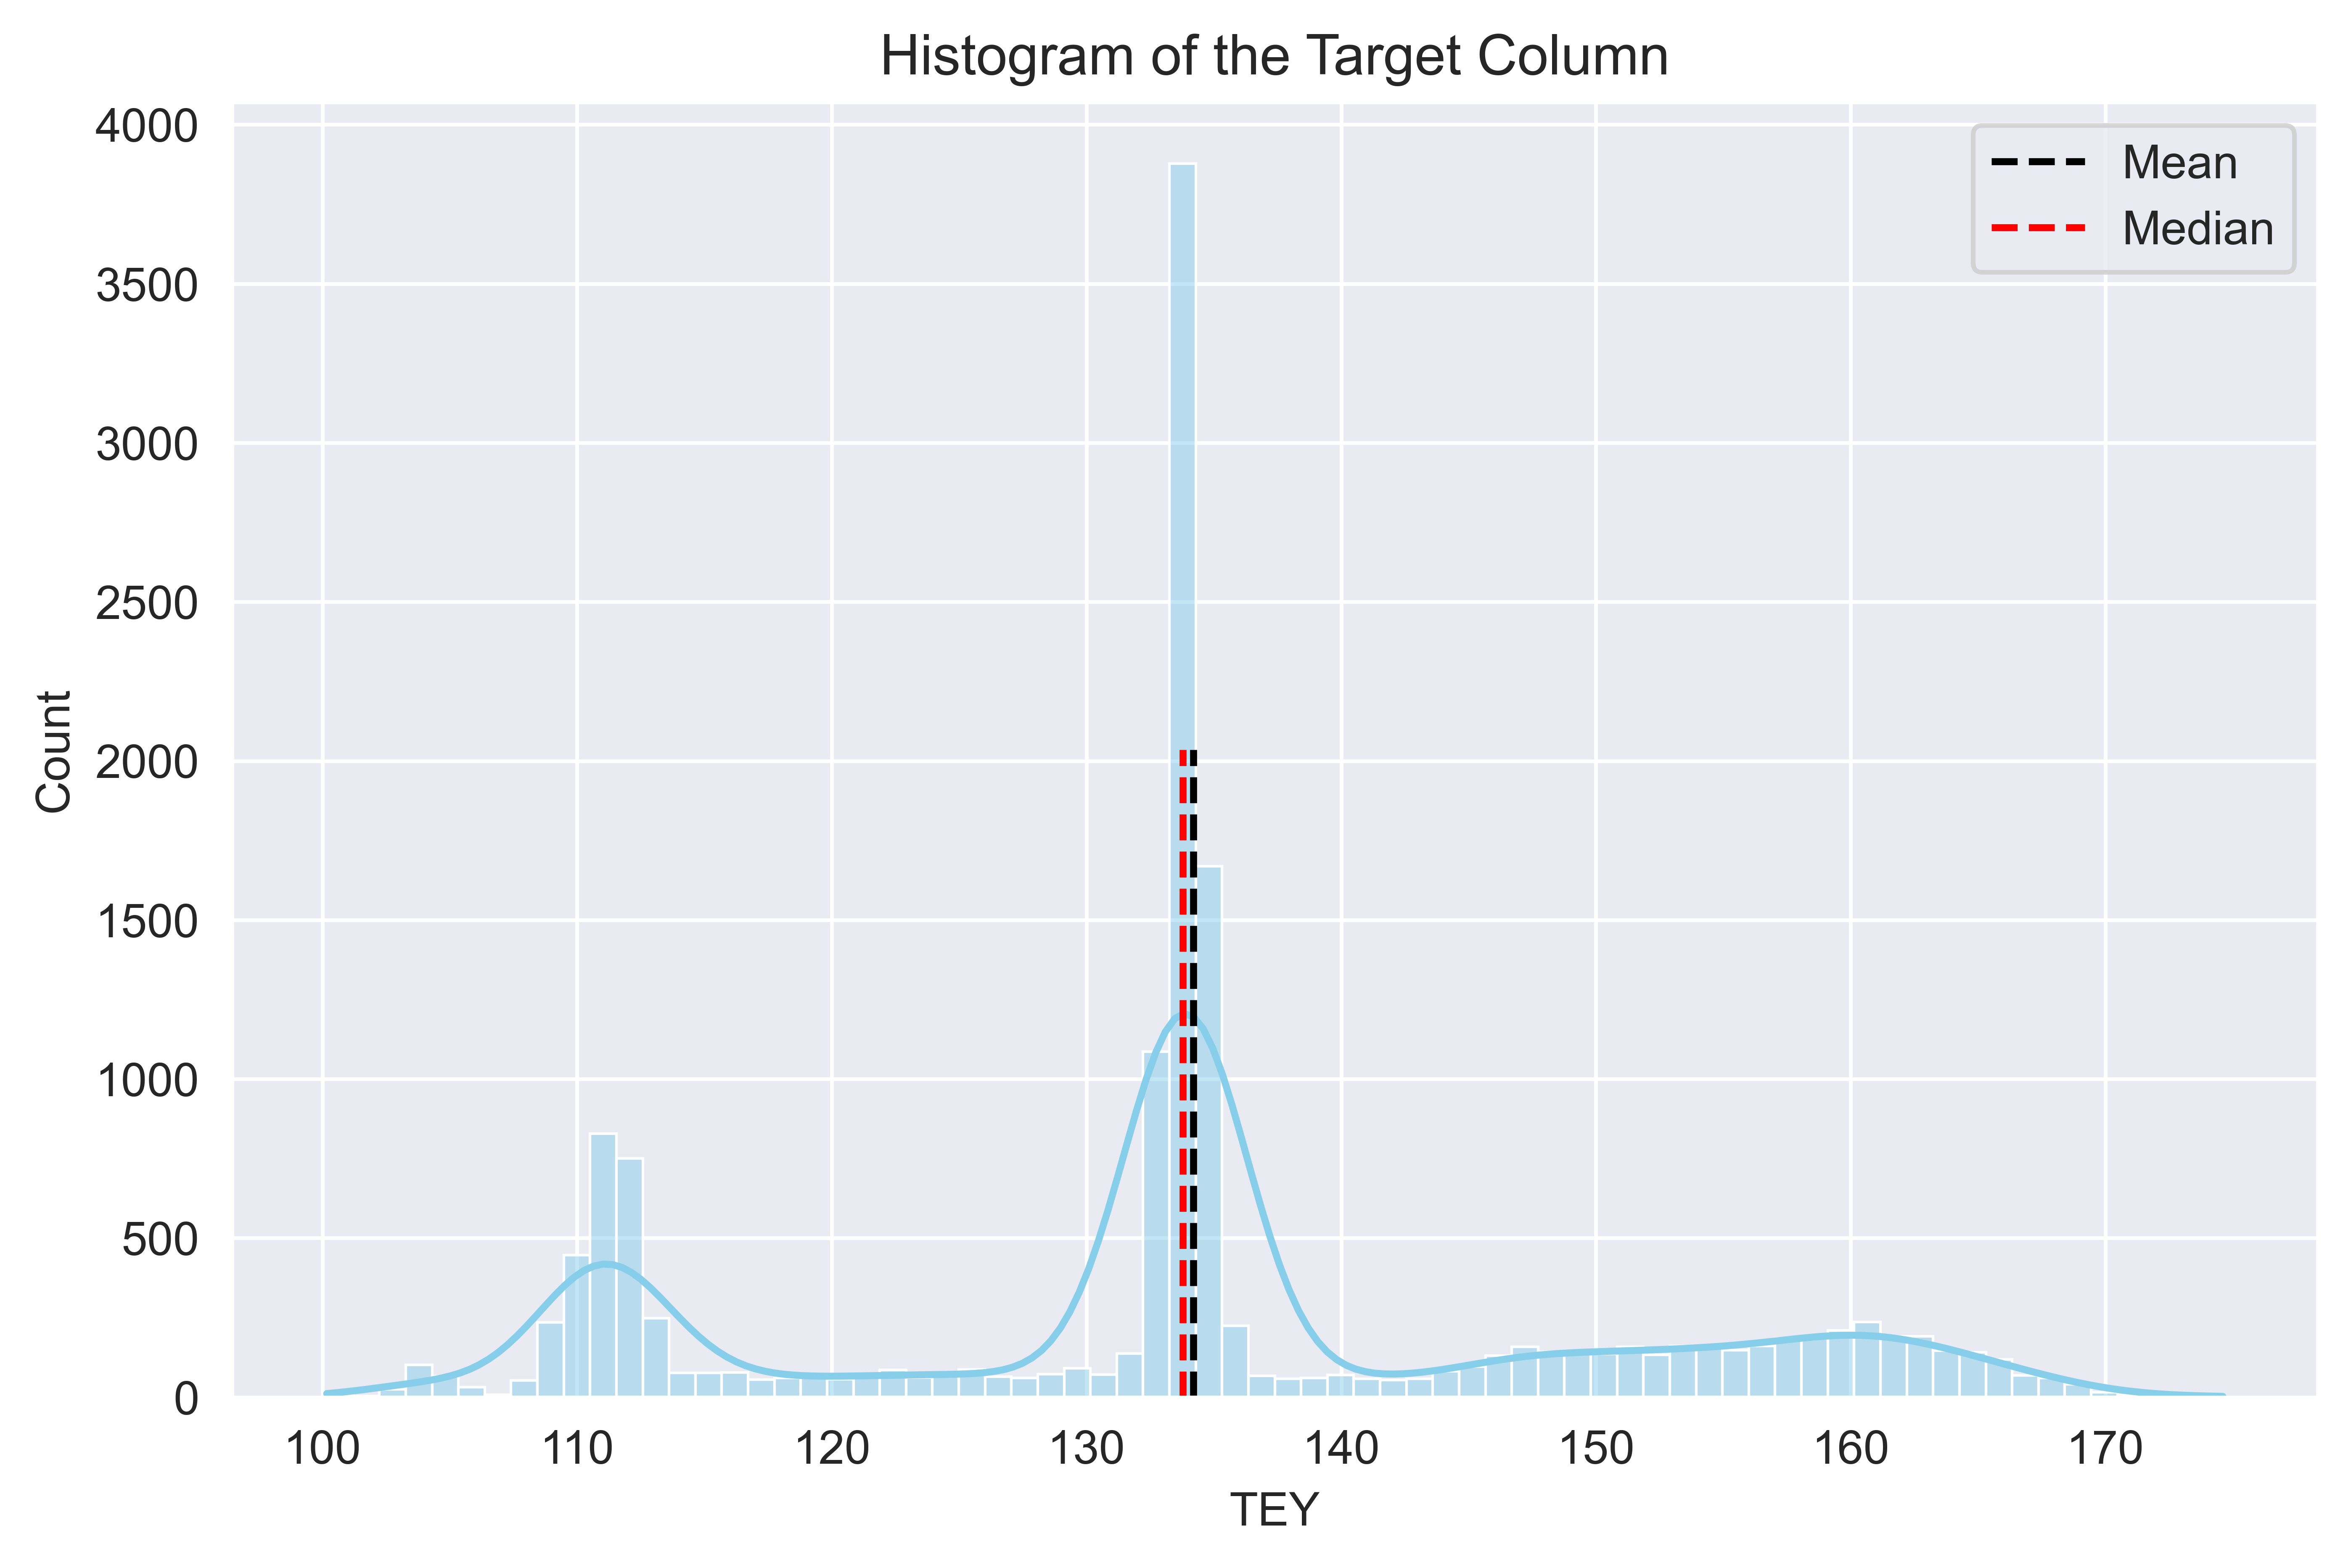

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5),dpi=800)
sns.histplot(data=df,x="TEY",color="skyblue",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.5,color="black",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.5,color="red",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

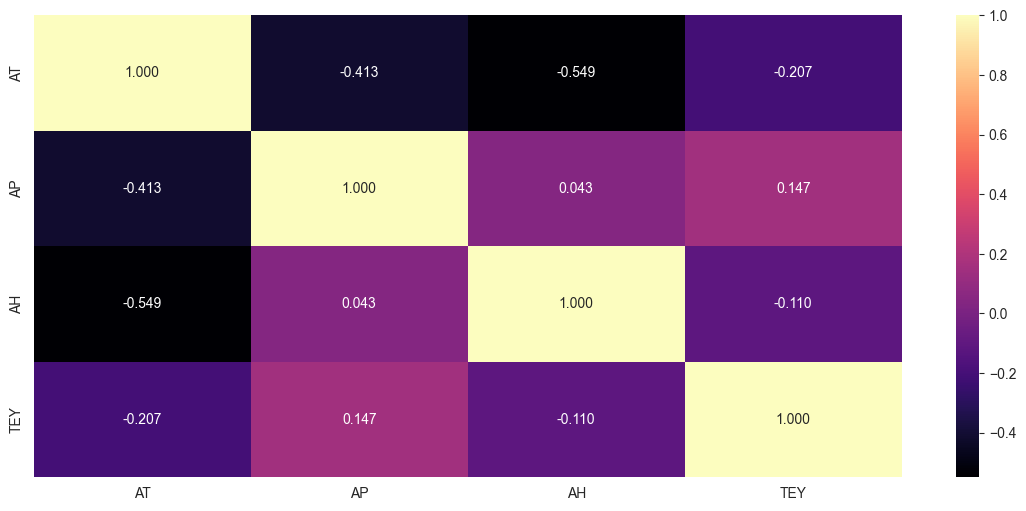

In [13]:
# Heatmap
plt.figure(figsize = (14, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

# Feature Analysis
All features in the dataset can be used in model building. This is a Regression Problem

In [14]:
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [15]:
# Splitting the data into train and test
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [16]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_test)
xtest_scale=scaler_x.transform(X_test)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_test)
ytest_scale=scaler_y.transform(y_test)

In [18]:
len(xtrain_scale)

10527

In [19]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [20]:
scores = fit.scores_
features = fit.transform(X)

In [21]:
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
0,0.412778,AT
1,0.137808,AP
2,0.097572,AH


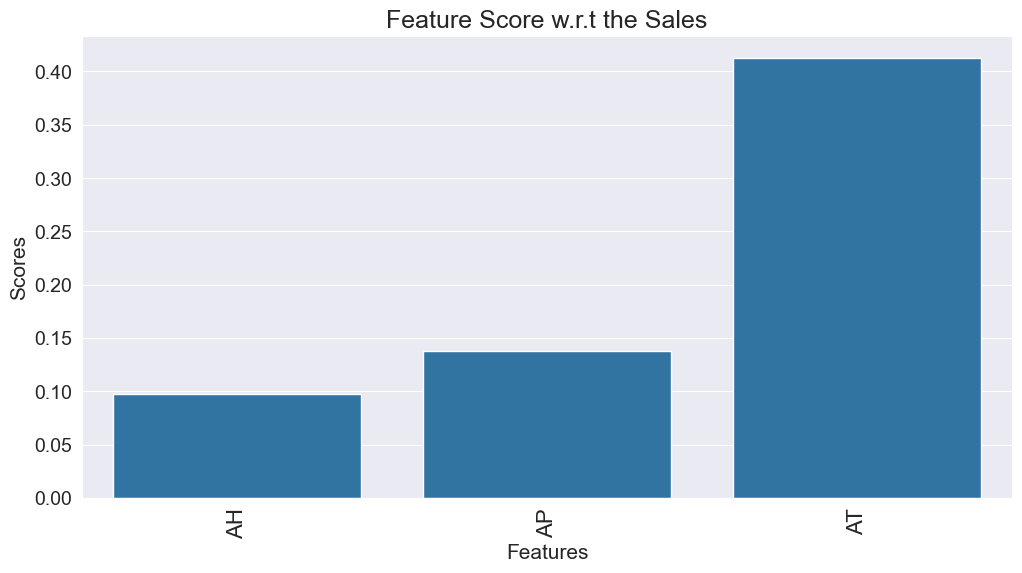

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [23]:
score_df.sort_values('Score', ascending=False)

,Score,Feature
0,0.412778,AT
1,0.137808,AP
2,0.097572,AH


### Neural network modelling

In [24]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

# Fit the model
hist = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1162 - mae: 0.2723 - mse: 0.1162 - val_loss: 0.0476 - val_mae: 0.1576 - val_mse: 0.0472
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0453 - mae: 0.1529 - mse: 0.0453 - val_loss: 0.0469 - val_mae: 0.1575 - val_mse: 0.0466
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0448 - mae: 0.1548 - mse: 0.0448 - val_loss: 0.0463 - val_mae: 0.1609 - val_mse: 0.0459
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0440 - mae: 0.1570 - mse: 0.0439 - val_loss: 0.0450 - val_mae: 0.1630 - val_mse: 0.0446
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0426 - mae: 0.1577 - mse: 0.0425 - val_loss: 0.0431 - val_mae: 0.1618 - val_mse: 0.0427
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0414 - mae: 0.1585 - mse: 0.0413 - val_loss: 0.0423 - val_mae: 0.1624 - val_mse: 0.0419
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0408 - mae: 0.1597 - mse: 0.0408 - val_loss:

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2106)           │        10,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,107 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,961 (148.29 KB)

 Trainable params: 12,653 (49.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,308 (98.86 KB)

In [26]:
# Define the first model architecture
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

# Compile the first model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the first model to the training data
model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 314.7861 - mae: 13.7784 - val_loss: 269.5423 - val_mae: 13.3072
Epoch 2/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 260.6403 - mae: 12.7125 - val_loss: 260.3338 - val_mae: 13.1449
Epoch 3/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 251.0267 - mae: 12.5844 - val_loss: 255.3951 - val_mae: 13.0501
Epoch 4/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 247.5751 - mae: 12.5632 - val_loss: 252.3351 - val_mae: 12.9828
Epoch 5/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 245.9674 - mae: 12.5495 - val_loss: 250.0105 - val_mae: 12.9184
Epoch 6/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 244.6612 - mae: 12.5200 - val_loss: 246.8524 - val_mae: 12.7867
Epoch 7/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 241.1729 - mae: 12.3619 - val_loss: 245.1891 - val_mae: 12.7447
Epoch 8/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 239.2838 - mae: 12.3158 - val_loss: 244.9684 - val_mae: 12.7519
Epoch 9/

In [27]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,021 (7.90 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,348 (5.27 KB)

In [28]:
# Define the second model architecture
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

# Compile the second model
model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

# Fit the second model to the training data
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.8687 - mse: 1394.0084 - val_loss: 11.7714 - val_mse: 251.8989
Epoch 2/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.4641 - mse: 252.6941 - val_loss: 11.3687 - val_mse: 245.6520
Epoch 3/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.4782 - mse: 250.1745 - val_loss: 11.9846 - val_mse: 250.4740
Epoch 4/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.5404 - mse: 248.8828 - val_loss: 11.4195 - val_mse: 243.1234
Epoch 5/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.4882 - mse: 247.1227 - val_loss: 11.2906 - val_mse: 241.2987
Epoch 6/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.4842 - mse: 246.3795 - val_loss: 11.3843 - val_mse: 241.9467
Epoch 7/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.5009 - mse: 246.3305 - val_loss: 11.2788 - val_mse: 240.7786
Epoch 8/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.4802 - mse: 246.0145 - val_loss: 11.2374 - val_mse: 240.2619

In [29]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

### Model Evaluation

In [30]:
y_predict = model.predict(xtest_scale)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


In [31]:
y_pred1 = model1.predict(xtest_scale)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


In [32]:
y_pred2 = model2.predict(xtest_scale)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


In [33]:
print(hist.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [34]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.038068,0.154379,0.038144,0.039755,0.157307,0.039458,95
96,0.037964,0.154238,0.038061,0.039685,0.157533,0.039404,96
97,0.038044,0.154250,0.038130,0.039711,0.157037,0.039417,97
98,0.037953,0.154100,0.038045,0.039780,0.156999,0.039490,98
99,0.037952,0.154006,0.038035,0.039635,0.157090,0.039359,99


### Visualising

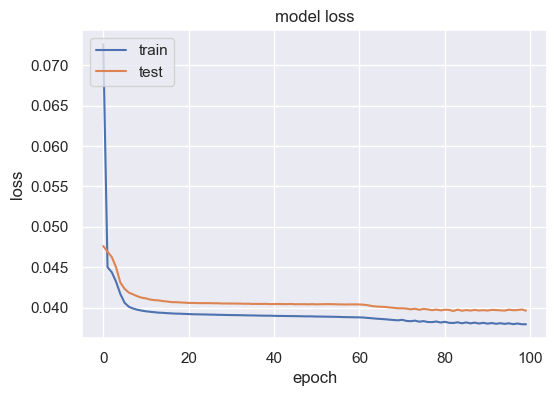

In [35]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

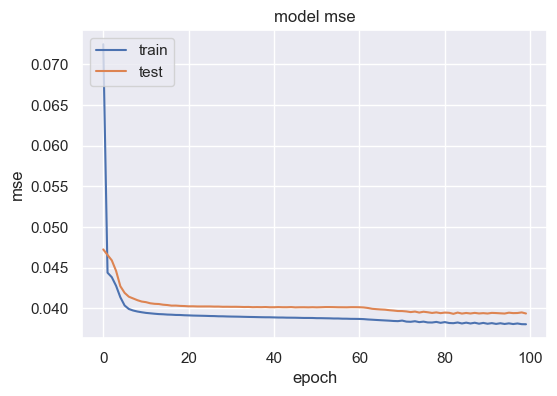

In [36]:
# summarize history for loss

plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()